In [1]:
x = list(range(10))

y = [1,1,2,4,5,7,8,9,9,10]

In [2]:
print(len(y))

10


In [4]:
print(len(x))

10


In [5]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
import matplotlib.pyplot as plt

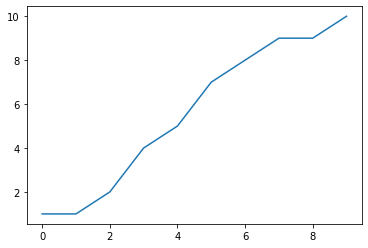

In [7]:
plt.plot(x,y)

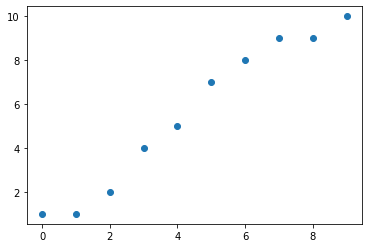

In [8]:
plt.scatter(x,y)

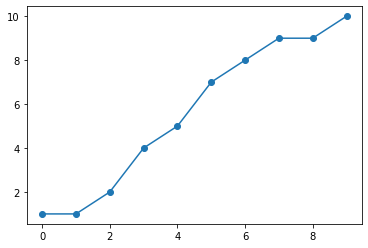

In [9]:
plt.plot(x,y)
plt.scatter(x,y)

In [14]:
class H():
    def __init__(self, w):
        self.w = w
    def forward(self, x):
        return self.w * x

In [17]:
def cost(h, x ,y):
    error = 0
    for i in range(len(x)):
        error += (h.forward(x[i]) - y[i]) ** 2
    error /= len(x)
    return error

In [18]:
h = H(4)
cost(h ,x ,y)

222.2

In [28]:
list_w = []
list_c = []

for i in range(-100, 100):
    w = i * 0.1
    h = H(w)
    c = cost(h, x, y)
    list_w.append(w)
    list_c.append(c)

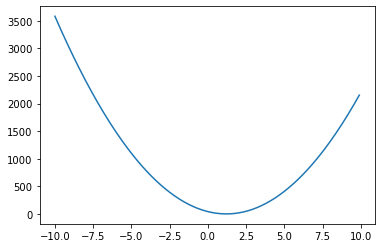

In [30]:
# plt.figure(figsize=(1,1))
plt.plot(list_w, list_c)

In [41]:
def cal_grad(w, cost):
    h = H(w)
    
    cost1 = cost(h, x, y)
    
    eps = 0.001
    h = H(w+eps)
    cost2 = cost(h, x, y)
    
    dcost = cost2 - cost1
    dw = eps
    
    grad = dcost / dw
    
    return grad, (cost1+cost2)*0.5

In [42]:
cal_grad(4, cost)

(159.02850000003355, 222.27951425)

In [47]:
lr = 0.01
w = 4

for i in range(10):
    grad, mean_cost = cal_grad(w,cost)
    w -= lr * grad
    print(w, mean_cost)

2.4097149999996645 222.27951425
1.7258924499999893 41.45555799238956
1.4318487535000344 8.021208480384255
1.3054099640050296 1.8391972556110414
1.2510412845221694 0.696143380150062
1.2276627523445358 0.4847927185772622
1.217609983508152 0.44571398125243855
1.2132872929085068 0.4384883227210767
1.2114285359506587 0.43715229845862746
1.210629270458786 0.43690526757250037


In [50]:
def cal_grad2(w, cost):
    h = H(w)
    
    grad = 0
    
    for i in range(len(x)):
        grad += 2 * (h.forward(x[i]) - y[i]) * x[i]
    grad = grad / len(x)
    
    c = cost(h, x, y)
    
    return grad, c

In [51]:
lr = 0.01
w = 4

for i in range(10):
    grad, mean_cost = cal_grad2(w,cost)
    w -= lr * grad
    print(w, mean_cost)

2.41 222.2
1.7263000000000002 41.44085000000001
1.432309 8.018483165000005
1.30589287 1.8386875372085008
1.2515339341 0.6960433256298524
1.228159591663 0.48476841090895945
1.21810862441509 0.4457036791770664
1.2137867084984888 0.4384806102798395
1.2119282846543502 0.4371450648407425
1.2111291624013707 0.43689812248905335
